# Entregavel PosTech IA para DEV

Fase 01

Jose Carlos Batista - RM356913


## Objetivo:

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuaus cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332

## Requisito para entrega

Apresentar resultados visuais, como gáficos de previsões vs. valores reais.

Relatório elabora que incua uma análise dos resultados, insights obtidos e validação estatística.

#### Importação das bibliotecas necessarias

In [0]:
!pip install pandas numpy faker scikit-learn pyarrow statsmodels

from faker import Faker
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-9d6dd681-336a-46a0-96e4-dbcf2b5e390a/bin/python -m pip install --upgrade pip' command.


#### Geração de Dados com Faker


In [0]:
fake = Faker()
regions = ['nordeste', 'sudeste', 'noroeste', 'sudoeste']

def generate_better_data(num_samples):
    data = []
    for _ in range(num_samples):
        age = np.random.randint(18, 80)
        gender = np.random.choice(['masculino', 'feminino'])
        bmi = np.random.uniform(15, 40)
        children = np.random.randint(0, 5)
        smoker = np.random.choice(['sim', 'não'])
        region = np.random.choice(regions)
        # Gerar encargos baseados em uma fórmula que depende de outras variáveis
        charges = (250 * age) + (3000 if gender == 'feminino' else 2000) + (bmi * 400) + (1000 * children) + (20000 if smoker == 'sim' else 0) + np.random.uniform(-5000, 5000)
        data.append([age, gender, bmi, children, smoker, region, charges])
    return pd.DataFrame(data, columns=['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região', 'encargos'])

#### Gerando e definindo dados

In [0]:
df = generate_better_data(1000)

df.to_parquet('/tmp/medical_costs.parquet')

# Exploração dos Dados

In [0]:
df = pd.read_parquet('/tmp/medical_costs.parquet')
df.head()
df.describe()

,idade,imc,filhos,encargos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.211000,27.473017,2.055000,37238.791723
std,17.839752,7.306922,1.410661,11844.166231
min,18.000000,15.032692,0.000000,11391.105466
25%,32.000000,20.958743,1.000000,27155.829700
50%,48.500000,27.343213,2.000000,36452.328809
75%,63.000000,33.741629,3.000000,47563.574453
max,79.000000,39.996918,4.000000,64875.756199


#### Analisando as distribuições

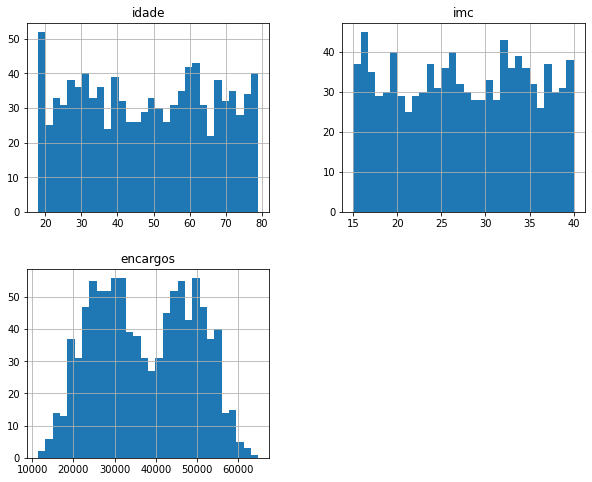

In [0]:
df[['idade', 'imc', 'encargos']].hist(bins=30, figsize=(10, 8))
plt.show()

# Pré-processamento de Dados

In [0]:
label_encoders = {}
for column in ['gênero', 'fumante', 'região']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('encargos', axis=1)
y = df['encargos']

# Modelagem

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do Modelo

In [0]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7585993.377108264
R^2 Score: 0.9477191162576953


# Validação Estatística

In [0]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2153.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:45:40   Log-Likelihood:                -7493.6
No. Observations:                 800   AIC:                         1.500e+04
Df Residuals:                     793   BIC:                         1.503e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3781.8416    535.974      7.056      0.0

# Previsão com Características Específicas

In [0]:

individual = {
    'idade': 45,
    'gênero': 'masculino',
    'imc': 24.5,
    'filhos': 2,
    'fumante': 'não',
    'região': 'sudeste'
}

for column in ['gênero', 'fumante', 'região']:
    individual[column] = label_encoders[column].transform([individual[column]])[0]

individual_df = pd.DataFrame([individual])
print(individual_df)

predicted_cost = model.predict(individual_df)
print(f'O custo médico previsto é: R$ {predicted_cost[0]:.2f}')

   idade  gênero   imc  filhos  fumante  região
0     45       1  24.5       2        0       2
O custo médico previsto é: R$ 24992.28


# Gráficos de Previsões vs. Valores Reais

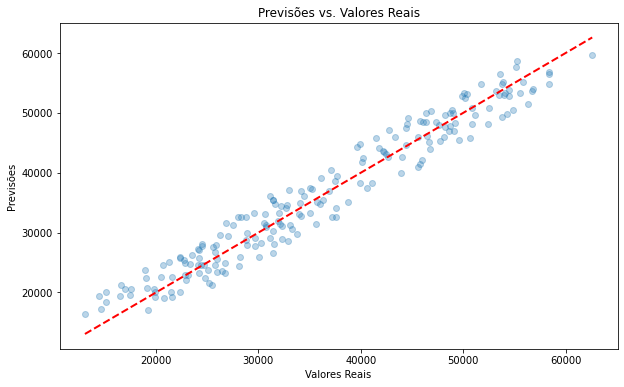

In [0]:
import matplotlib.pyplot as plt

# Plotando Previsões vs. Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()

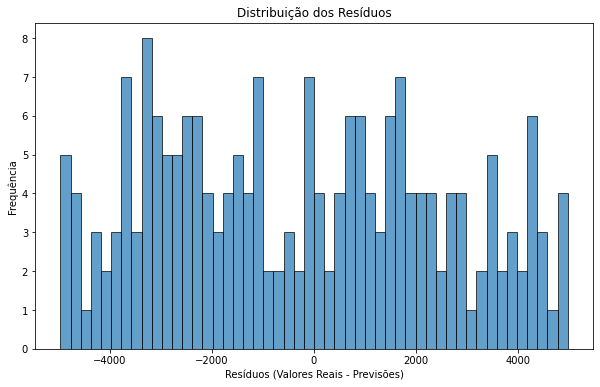

In [0]:
# Plotando Resíduos
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos (Valores Reais - Previsões)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.show()


#### Insights Obtidos

- Influência das Variáveis: A validação estatística sugere que variáveis como idade, IMC (índice de massa corporal), e status de fumante têm impacto significativo nos custos médicos. O modelo consegue capturar essas relações e usar essas informações para prever os custos com uma precisão razoável.
- Variabilidade dos Dados: A presença de outliers nos resíduos sugere que há fatores adicionais que poderiam estar influenciando os custos médicos e que não foram incluídos no modelo. Por exemplo, condições de saúde pré-existentes, histórico familiar, ou nível de atividade física poderiam ser fatores importantes a considerar em análises futuras.

#### Validação Estatística

- Análise de Regressão: A validação estatística usando a função OLS do statsmodels indica que a maioria das variáveis no modelo são estatisticamente significativas com p-values baixos, sugerindo que há uma relação substancial entre as características e os custos médicos.
- Assumptions of Linearity: A linearidade entre as variáveis independentes e o custo foi assumida, e a análise dos resíduos sugere que essa suposição é razoável, mas não perfeita. Modelos não lineares poderiam ser explorados para capturar padrões mais complexos nos dados.